In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import vco

pd.options.display.max_rows = 100

In [2]:
csvCh1 = "./F0003CH1.CSV"
csvCh2 = "./F0003CH2.CSV"


columnNames = ["Parameter", "Value", "Empty", "X", "Y", "NaN"]
ch1 = pd.read_csv(csvCh1, names=columnNames)
ch2 = pd.read_csv(csvCh2, names=columnNames)

csvSet = "./F0003TEK.SET"

settingsColumns = ["Parameter", "Value"]
settings = pd.read_csv(csvSet, delimiter=" ", lineterminator=";",names=settingsColumns)

In [3]:
print("Settings:")
print(settings)
print(("Other parameters:"))
print(ch1.Parameter,ch2.Value)
print(ch2.Parameter)
print("Raw Data")
print(ch1.Y)
print(ch2.Y)

Settings:
                             Parameter      Value
0                      :DISPLAY:FORMAT         YT
1                                STYLE    VECTORS
2                          PERSISTENCE          0
3                        :ACQUIRE:MODE    AVERAGE
4                               NUMAVG        128
5                                STATE          1
6                            STOPAFTER    RUNSTOP
7                           :CH1:PROBE      1.0E0
8                         CURRENTPROBE      1.0E1
9                                SCALE     5.0E-3
10                            POSITION   -3.214E2
11                            COUPLING         DC
12                           BANDWIDTH        OFF
13                              INVERT        OFF
14                               YUNIT          V
15                          :CH2:PROBE      1.0E0
16                        CURRENTPROBE      1.0E1
17                               SCALE     6.0E-2
18                            POSITION  

In [4]:
microwaves = vco.voltageToFrequency(ch2.Y)
normalizedIntensity = ch1.Y/np.amax(ch1.Y)

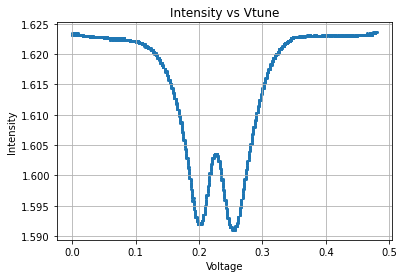

In [5]:
plt.scatter(ch2.Y,ch1.Y,s=4)
plt.title("Intensity vs Vtune")
plt.xlabel("Voltage")
plt.ylabel("Intensity")
plt.grid()
plt.show()

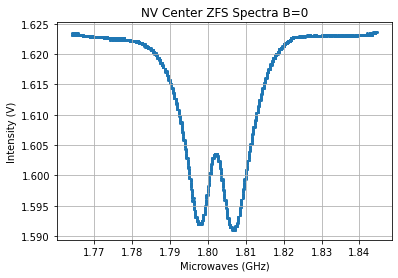

In [6]:
plt.scatter(microwaves,ch1.Y,s=4)
plt.title("NV Center ZFS Spectra B=0")
plt.xlabel("Microwaves (GHz)")
plt.ylabel("Intensity (V)")
plt.grid()
plt.show()

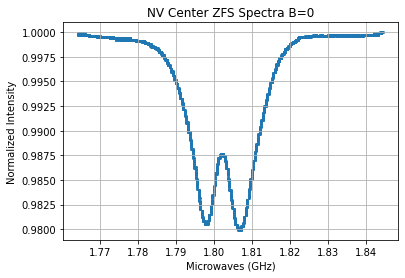

In [7]:
plt.scatter(microwaves,normalizedIntensity,s=4)
plt.title("NV Center ZFS Spectra B=0")
plt.xlabel("Microwaves (GHz)")
plt.ylabel("Normalized Intensity")
plt.grid()
plt.show()

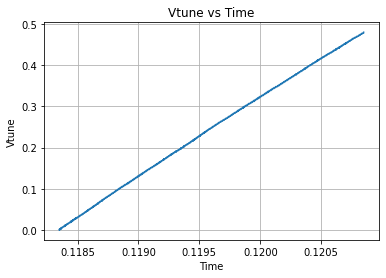

In [8]:
plt.plot(ch2.X,ch2.Y)
plt.title("Vtune vs Time")
plt.xlabel("Time")
plt.ylabel("Vtune")
plt.grid()